In [7]:
### Python 3.10 recommended

#from easymlpy.datasets import load_prostate, load_cocaine_dependence
from easymlpy.glmnet import easy_glmnet

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import csv

In [9]:
data = np.load("highway_data_regression_simpleIRL.npy",allow_pickle=True).tolist()

In [15]:
df = pd.DataFrame(data)
df_exclude = df.drop([2,29,45]) #no reward for crash(dec)
# df.to_csv('highway_lasso.csv')

In [12]:
# output.plot_model_performance_test()
# output.plot_model_performance_train()
# output.plot_coefficients()

In [38]:
output = target_output
print(type(output))
print(type(output.coefficients), np.shape(output.coefficients))
print(type(output.column_names), len(output.column_names))

<class 'easymlpy.glmnet.easy_glmnet'>
<class 'numpy.ndarray'> (1000, 3)
<class 'list'> 3


In [100]:
# def plot_coef(output,SD_multiplier = 1.96):
#     coef_data = pd.DataFrame({'coef_mean':np.mean(output.coefficients,axis=0),
#                               'coef_err':np.std(output.coefficients,axis=0)*SD_multiplier,
#                               'varname':output.column_names
#                              })
    
#     coef_data = coef_data.sort_values(by=['coef_mean'])
#     fig, ax = plt.subplots(figsize=(6, 3))
#     coef_data.plot(x='varname', y='coef_mean', kind='barh', 
#                  ax=ax, color='none', 
#                  xerr='coef_err', legend=False, fontsize=15)
#     ax.set_xlabel('Coefficient estimates',fontsize=15)
#     ax.set_ylabel('')#!/usr/bin/env python3

def run_Lasso(data,exclude_variables):
    output= easy_glmnet(data, 'BIS',
                     random_state=1000, progress_bar=True, n_core=1,
                     exclude_variables=exclude_variables,
                     n_samples=1000, n_divisions=1000, n_iterations=100,
                     model_args={'alpha': 1, 'n_lambda': 200})
    return output

def plot_performance(output,bins=25,ylim = 150):
    plt.subplots(figsize=(6, 2))
    plt.hist(output.model_performance_train,bins=bins)
    plt.xlabel('Correlation score',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([0,1])
    plt.ylim([0,ylim])
    print('r = ' + str(np.around(np.mean(output.model_performance_train),2)))

In [108]:
def plot_coef(output, SD_multiplier=1.96):
    coef_data = pd.DataFrame({
        'coef_mean': np.mean(output.coefficients, axis=0),
        'coef_err': np.std(output.coefficients, axis=0) * SD_multiplier,
        'varname': output.column_names
    }).sort_values('coef_mean')

    fig, ax = plt.subplots(figsize=(6, 3))
    # main horizontal bars (error bars only)
    coef_data.plot(
        x='varname', y='coef_mean', kind='barh',
        ax=ax, color='none', edgecolor='none',
        xerr=coef_data['coef_err'].to_numpy(),
        legend=False, fontsize=15
    )

    # draw circles at each coefficient mean
    ax.scatter(
        coef_data['coef_mean'],
        np.arange(len(coef_data)),   # match y positions of bars
        color='black', s=50, zorder=3
    )

    ax.axvline(0, ls='--', lw=1)
    ax.set_xlabel('Coefficient estimates', fontsize=15)
    ax.set_ylabel('')
    ax.tick_params(axis="x", labelsize=10)
    plt.tight_layout()
    return fig, ax


In [16]:
df

,BIS,gng_error,gng_rt,log_k,highway_distance,highway_score,highway_speed,highway_num_crash,IRL_speed_distance,IRL_overtaking,IRL_crash
0,0.780488,0.493512,0.493512,0.736180,0.844984,0.677604,1.000000,0.661972,0.534521,0.098477,0.529396
1,1.000000,0.668603,0.668603,0.335565,0.941461,0.047783,0.423568,0.774648,0.773235,0.672321,0.183810
2,0.390244,0.137611,0.137611,0.405695,0.828446,0.254495,0.889033,0.936620,0.797671,0.424416,0.000000
3,0.243902,0.231339,0.231339,0.777359,0.794838,0.425397,0.619908,0.549296,0.366919,0.585790,0.483671
4,0.341463,0.562114,0.562114,0.515643,0.555505,0.861940,0.422880,0.176056,0.173452,0.211660,0.430674
5,0.219512,0.519896,0.519896,0.736256,0.444042,0.494282,0.189902,0.112676,0.516670,0.001957,0.371502
6,0.463415,0.386303,0.386303,0.381906,1.000000,0.448284,0.262539,0.211268,0.310541,0.435107,0.476091
7,0.536585,0.638400,0.638400,0.402515,0.348526,0.247442,0.367742,0.401408,0.367510,0.087294,0.314811
8,0.390244,0.281761,0.281761,0.441812,0.139474,0.263179,0.092354,0.063380,0.262419,0.394866,0.478387
9,0.414634,0.466376,0.466376,0.773791,0.397308,0.434589,0.125245,0.049296,0.721927,0.485246,0.290886


In [12]:
##data frame to use
# df_lasso = df_exclude
df_lasso = df

In [11]:
##### highway behaviors+IRL only
exclude_variables = ['gng_error', 'gng_rt', 'log_k']
output_highwayIRL = run_Lasso(df_lasso,exclude_variables)
np.save("Lasso_highway_simpleIRL_dfEx",output_highwayIRL)

  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Generating coefficients from multiple model builds:


  0% (2 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:01:01

Generating predictions for a single train test split:


 99% (998 of 1000) |#################### | Elapsed Time: 0:00:59 ETA:   0:00:00

Generating measures of model performance over multiple train test splits:


 99% (999 of 1000) |#################### | Elapsed Time: 1:38:41 ETA:   0:00:05

In [12]:
##### IRL only
exclude_variables = ['gng_error', 'gng_rt', 'log_k', 'highway_distance',
           'highway_score', 'highway_speed', 'highway_num_crash']
output_IRL = run_Lasso(df_lasso,exclude_variables)
np.save("Lasso_simpleIRL_dfEx",output_IRL)

  0% (2 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:00:59

Generating coefficients from multiple model builds:


  0% (2 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:01:03

Generating predictions for a single train test split:


 99% (998 of 1000) |#################### | Elapsed Time: 0:00:59 ETA:   0:00:00

Generating measures of model performance over multiple train test splits:


 99% (999 of 1000) |#################### | Elapsed Time: 1:30:00 ETA:   0:00:05

In [14]:
##### IRL only: no crash
exclude_variables = ['gng_error', 'gng_rt', 'log_k', 'highway_distance',
           'highway_score', 'highway_speed', 'highway_num_crash','IRL_crash']
output_IRL_nc = run_Lasso(df_lasso,exclude_variables)
np.save("Lasso_simpleIRL_df_nc",output_IRL_nc)

  0% (2 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:01:00

Generating coefficients from multiple model builds:


  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Generating predictions for a single train test split:


 99% (998 of 1000) |#################### | Elapsed Time: 0:00:59 ETA:   0:00:00

Generating measures of model performance over multiple train test splits:


 99% (999 of 1000) |#################### | Elapsed Time: 1:29:29 ETA:   0:00:05

In [19]:
##### highway behaviors+IRL only: no crash
exclude_variables = ['gng_error', 'gng_rt', 'log_k','IRL_crash']
output_highwayIRL_nc = run_Lasso(df_lasso,exclude_variables)
np.save("Lasso_highway_simpleIRL_df_nc",output_highwayIRL_nc)

  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Generating coefficients from multiple model builds:


  0% (2 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:01:01

Generating predictions for a single train test split:


 99% (998 of 1000) |#################### | Elapsed Time: 0:01:03 ETA:   0:00:00

Generating measures of model performance over multiple train test splits:


 99% (999 of 1000) |#################### | Elapsed Time: 1:40:41 ETA:   0:00:05

NameError: name 'output_highwayIRL_nc' is not defined

In [83]:
output_highwayIRL = np.load('Lasso_highway_simpleIRL_dfEx.npy', allow_pickle = True).tolist() ## highway + IRL
output_IRL = np.load('Lasso_simpleIRL_dfEx.npy', allow_pickle = True).tolist() ## IRL only

In [84]:
target_output = np.load('Lasso_traditional_dfEx.npy', allow_pickle = True).tolist() ## traditional data only

r = 0.1


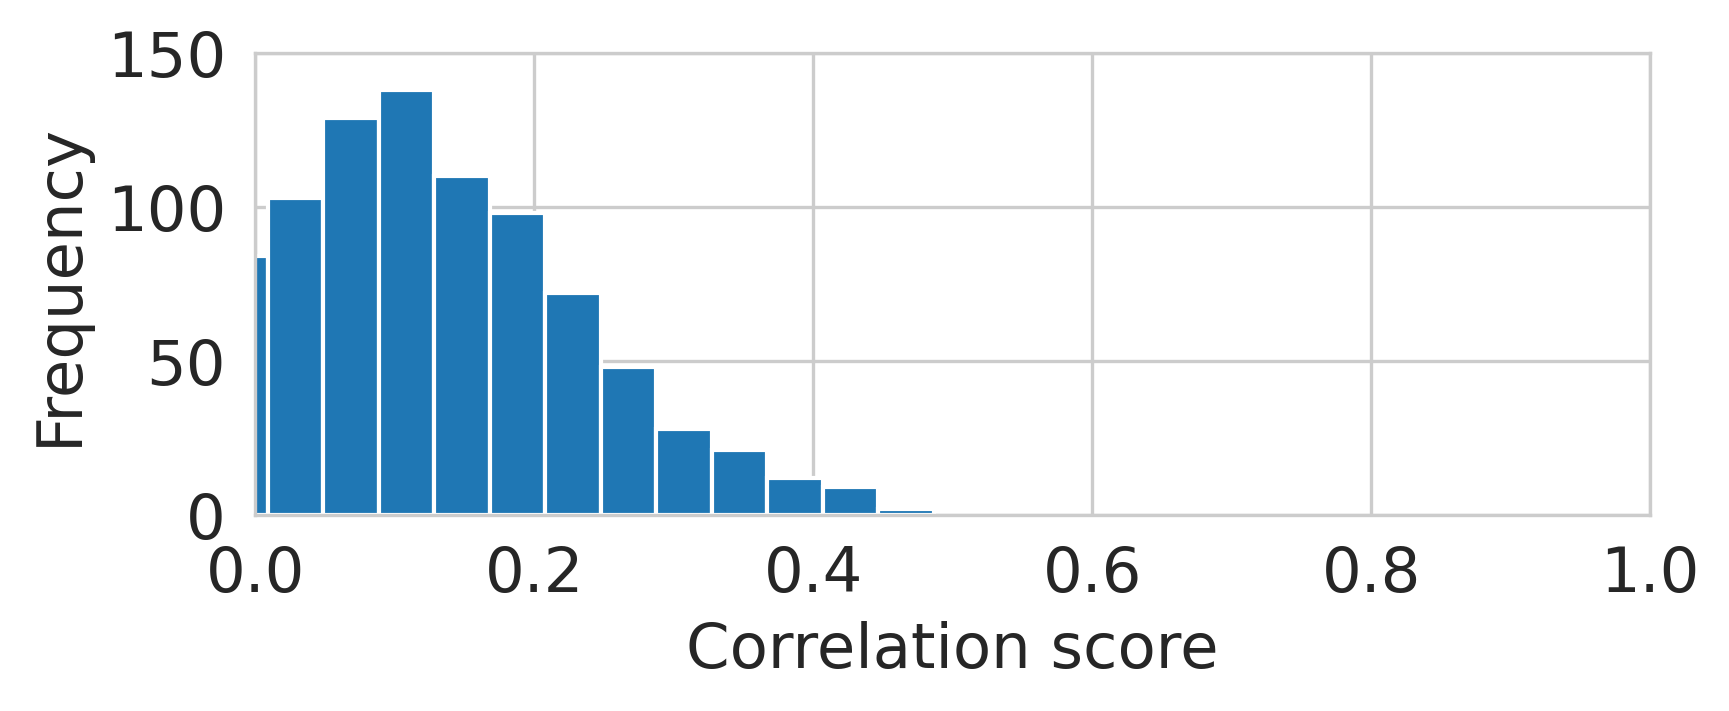

In [85]:
plt.rcParams['figure.dpi'] = 300
plot_performance(target_output, bins = 20, ylim = 150)

(<Figure size 1800x900 with 1 Axes>, <Axes: xlabel='Coefficient estimates'>)

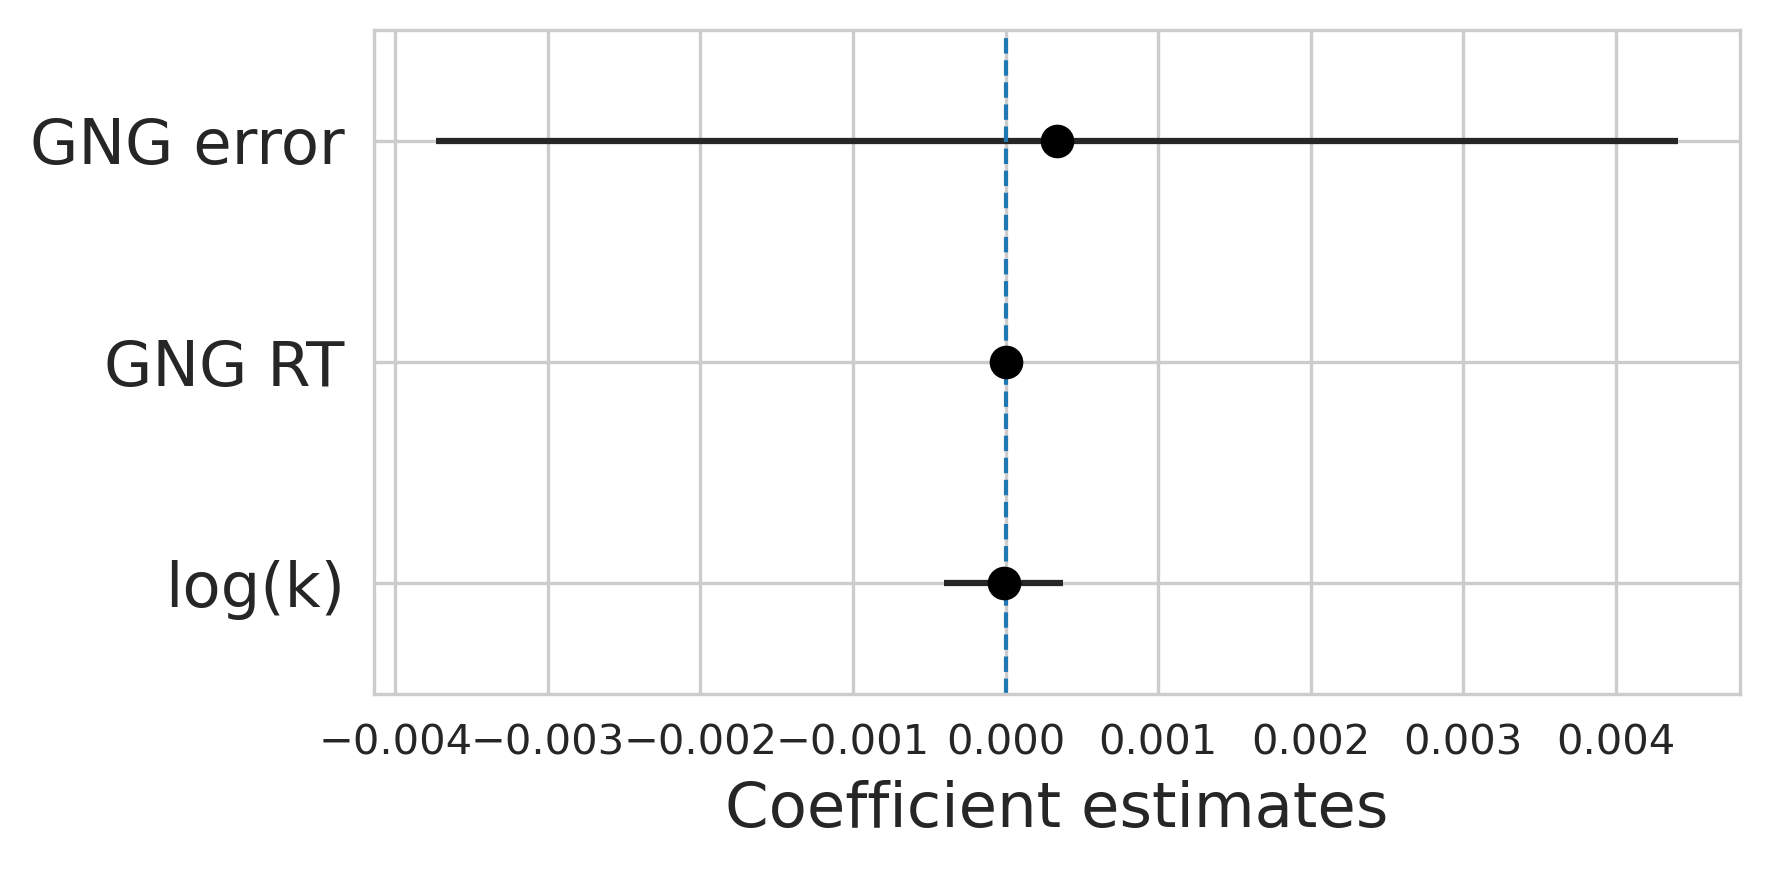

In [110]:
# plt.rcParams['figure.dpi'] = 300
plot_coef(target_output,SD_multiplier = 1.96)

In [111]:
target_output.column_names

['GNG error', 'GNG RT', 'log(k)']

In [88]:
target_output.column_names = ['GNG error', 'GNG RT', 'log(k)']
# # ##highway
# target_output.column_names = ['Highway distance', 'Highway score', 'Highway speed',
#                              'Highway n(crash)']
##IRL
# target_output.column_names = ['IRL speed*distance', 'IRL overtaking',
#                              'IRL crash']
# ##IRL+highway
# target_output.column_names = ['Highway distance', 'Highway score', 'Highway speed',
#                              'Highway n(crash)', 'IRL speed*distance', 'IRL overtaking',
#                              'IRL crash']

(<Figure size 1800x900 with 1 Axes>, <Axes: xlabel='Coefficient estimates'>)

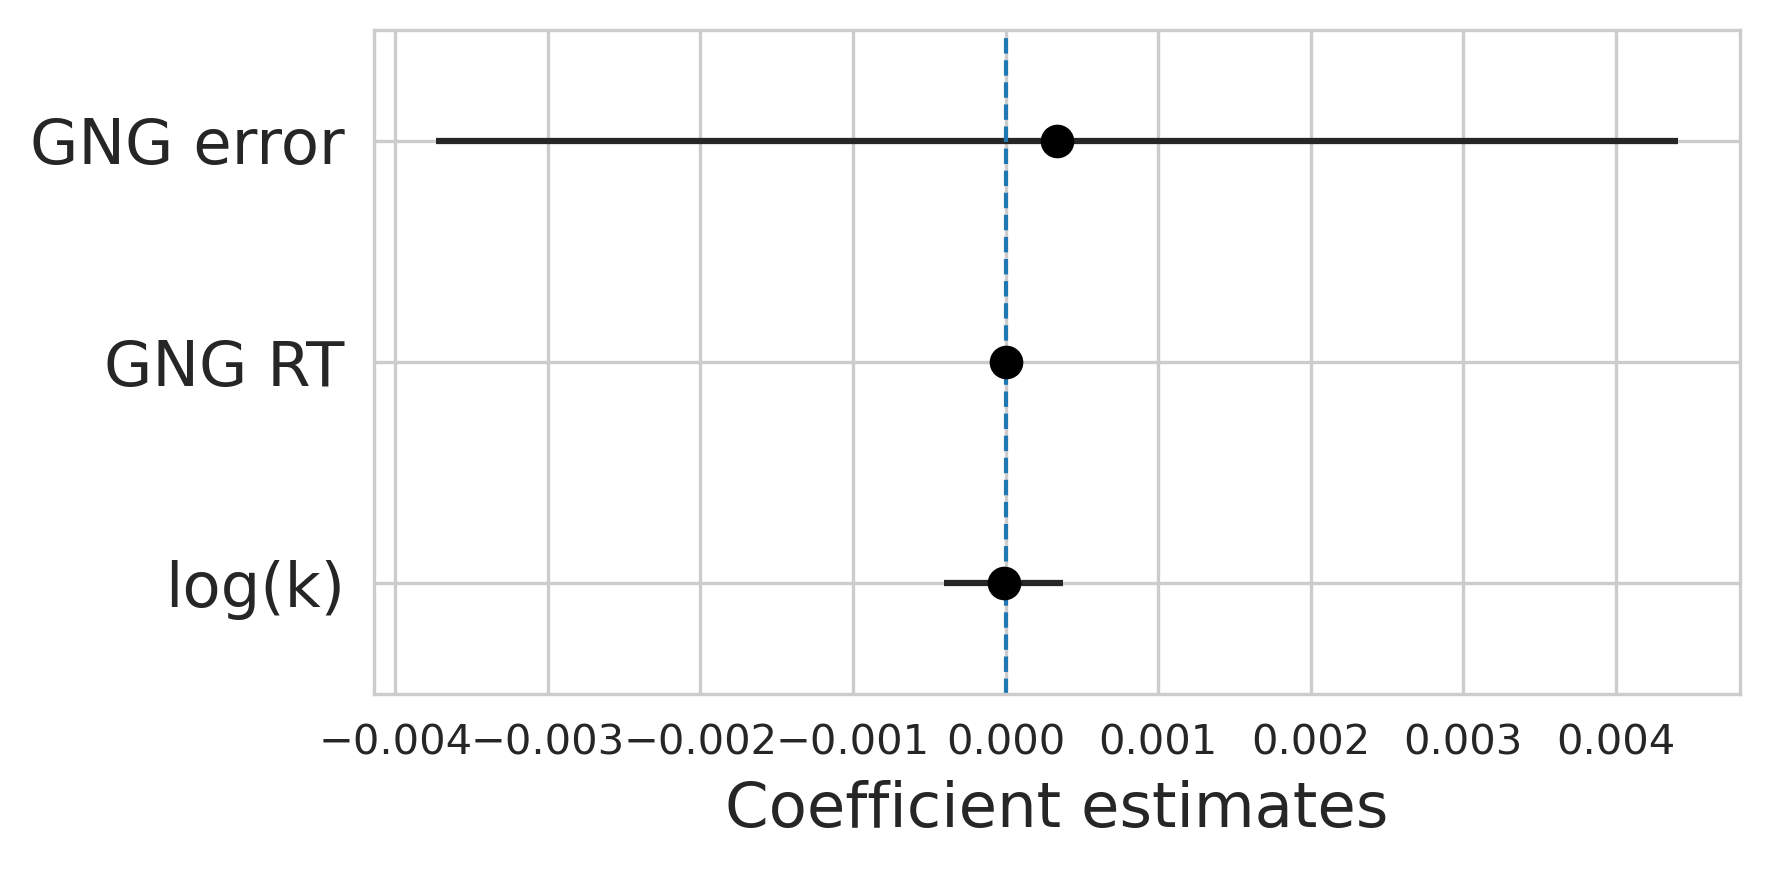

In [112]:
plt.rcParams['figure.dpi'] = 300
plot_coef(target_output,SD_multiplier = 1.96)